In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import random as rnd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input, Activation, BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, MeanSquaredError
import os
import warnings
import re

In [2]:
directory = "DATA_08_11"

In [3]:
#create a dictionary for maps
map_dict ={}

#create a results dictionary
results_dict = {}

#reg ex for grabbing map id
pattern = "map_([0-9]+)\.csv"

emptyResultCount = 0

warnings.filterwarnings("error", "loadtxt: Empty input file*", category=UserWarning)

#go through each file in the dataset by their names.
for filename in os.listdir(directory):
    
    #if the file is a map...
    if filename.startswith("map"):       
    
        match = re.search(pattern, filename, re.IGNORECASE)
        
        if match:
            
            #map id gets the value of the first match ([0-9]+) ie the map id
            map_id = match.group(1)
            #map_d.append(read_csv(….).values(49,49
            map_dict[map_id] = np.loadtxt(os.path.join(directory, filename), dtype=int, delimiter=',')
            map_dict[map_id] = np.delete(map_dict[map_id], (0), axis=0)
    
    elif filename.startswith("players"):
        #check to see if it is empty or not!
        try:
            #z gets the player info as a matrix, each row corresponding to w/l/d on a particular map.
            z = np.loadtxt(os.path.join(directory, filename), dtype=int, delimiter=',', skiprows=1)
            
            #if more than one map result set
            if (len(z.shape) > 1):
                for row in z:
                    #if the map already exists in results add it to existing dictionary entry
                    #else make a new entry at the current row.
                    #row[0] corresponds to the map number.
                    if str(row[0]) in results_dict:
                        
                        wR = row[1]/sum(row[1:])
                        if(wR > 0.06):
                            results_dict[str(row[0])] += row[1:]
                            
                    else:
                        wR = row[1]/sum(row[1:])
                        if(wR > 0.06):
                            results_dict[str(row[0])] = row[1:]      
            
            else:
                if str(z[0]) in results_dict:
                    wR = row[1]/sum(row[1:])
                    if(wR > 0.06):
                        results_dict[str(z[0])] += z[1:]
                
                else:
                    wR = row[1]/sum(row[1:])
                    if(wR > 0.06):
                        results_dict[str(z[0])] = z[1:]

        except Warning:
            emptyResultCount += 1

print("In total ", emptyResultCount, " empty results were disregarded.")

In total  1253  empty results were disregarded.


Below the result list is checked for maps that do not appear in it. If a map id does not appear in the results list than there have been no matches played on it and therefore no data associated with it so it can be removed.

Similarly the map list is checked for entries that do not correspond to a result, again, these are removed.

I took the step of removing maps with less than 500 associated results.

In [4]:
map_list = list(map_dict.keys())
result_list = list(results_dict.keys())
for m in map_list:
    if m not in result_list:
        del map_dict[m]
        del m
        
for r in result_list:
    if r not in map_list:
        del results_dict[r]
        del r

In [5]:
print("Number of Maps    :", len(map_dict))
print("Number of Results :", len(results_dict))

Number of Maps    : 6676
Number of Results : 6676


In [6]:
print("Number of Maps    :", len(map_dict))
print("Number of Results :", len(results_dict))

Number of Maps    : 6676
Number of Results : 6676


In [7]:
maps = np.zeros((len(map_dict), 49, 49, 5), dtype=int)
results = np.zeros(len(results_dict), dtype=float)

In [8]:
idx = 0
for k, v in map_dict.items():
    #print(len(v), ":", len(v[0]))
    for i in range(len(v)):
        for j in range(len(v[i])):
            if v[i][j] == 1:
                maps[idx, i, j, 0] = 1
            elif v[i][j] == 2:
                maps[idx, i, j, 1] = 1
            elif v[i][j] == 8:
                maps[idx, i, j, 2] = 1
                maps[idx, i, j, 1] = 1
            elif v[i][j] == 9:
                maps[idx, i, j, 3] = 1
                maps[idx, i, j, 1] = 1
            elif v[i][j] == 10:
                maps[idx, i, j, 4] = 1
                maps[idx, i, j, 1] = 1
                
    total_matches = np.sum(results_dict[k])
    
    win_chance = results_dict[k][0] / total_matches
    
    results[idx] = win_chance
    
    
    idx += 1

In [9]:
import sys
np.set_printoptions(threshold=sys.maxsize)
maps[48]

array([[[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],


Below is a histogram representation of the player 1 win rate across the various maps. '0' on the visualisation representing the maps player 1 never wins on and '1' representing the maps that they always win on.

As you can see below the majority of map results are centered around the '0.5' range, unfortunately this is the least conclusive result for the model to learn from.

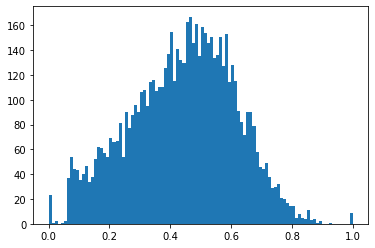

In [10]:
num_bins = 100
bin_range = (0.0, 1.0)
lvls = plt.hist(results, bins=num_bins, range=bin_range, rwidth=1)

In [11]:
results.shape

(6676,)

In [12]:
rnd.seed()
trainX, testX, trainY, testY = train_test_split(maps, results, test_size=0.2, random_state=rnd.randint(1, 100))

In [13]:
trainX.shape

(5340, 49, 49, 5)

In [14]:
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(5340, 49, 49, 5)
(1336, 49, 49, 5)
(5340,)
(1336,)


In [15]:
# construct the image generator for data augmentation then
# initialize the total number of images generated thus far
aug = ImageDataGenerator(
    width_shift_range=2,
    height_shift_range=2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest")

In [16]:
sampleAug = aug.flow(map_dict[map_list[42]].reshape(1, 49, 49, 1), batch_size=1)
sampleBatch = sampleAug.next()
augmentedMap = sampleBatch[0].reshape(49, 49)

(-0.5, 48.5, 48.5, -0.5)

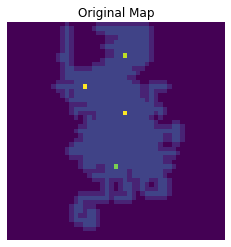

In [17]:
plt.imshow(map_dict[map_list[42]])
plt.title("Original Map")
plt.axis("off")

(-0.5, 48.5, 48.5, -0.5)

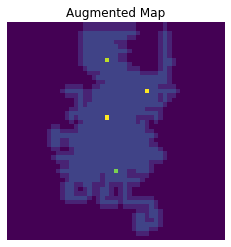

In [18]:
plt.imshow(augmentedMap)
plt.title("Augmented Map")
plt.axis("off")

In [19]:
input_img = Input(shape=(49, 49, 5))
model = Sequential()
model.add(Conv2D(64, (3, 3), padding="same", input_shape = (49,49,5), activation="relu"))
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same", input_shape = (49,49,5), activation="relu"))
model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(256, activation="relu"))
#model.add(Dropout(0.25))
model.add(Dense(1, activation="sigmoid"))


In [20]:
model.compile(optimizer=Adam(lr=1e-4), loss="mae", metrics=["mae"])

The ImageDataGenerator object is added to the fit function. Newly augmented maps "flow" out of it in lieu of the OG data. The augmented data is newly generated each epoch as a measure to avoid overfitting by increasing the generality of the solution. It seems to work well with this model. The parametes chosen for data augmentation are specified above. 

Given the nature of the maps in question and thier small resolution certain augmentation methods were not appropriate (shear, zoom, rotate). In the end I settled on image shift left or right, up or down, horizantal flip and vertical flip.

In [21]:
bs = 32
h = model.fit(x=aug.flow(trainX, trainY, batch_size=bs),
              validation_data=(testX, testY),
              steps_per_epoch=len(trainX) // bs, 
              epochs=15)

  ...
    to  
  ['...']


C:\Users\spren\anaconda3\envs\Python3_7\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (5340, 49, 49, 5) (5 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


Train for 166 steps, validate on 1336 samples
Epoch 1/15
166/166 [==============================] - 62s 376ms/step - loss: 0.1405 - mae: 0.1405 - val_loss: 0.1393 - val_mae: 0.1393
Epoch 2/15
166/166 [==============================] - 59s 356ms/step - loss: 0.1396 - mae: 0.1396 - val_loss: 0.1394 - val_mae: 0.1394
Epoch 3/15
166/166 [==============================] - 62s 374ms/step - loss: 0.1393 - mae: 0.1393 - val_loss: 0.1387 - val_mae: 0.1387
Epoch 4/15
166/166 [==============================] - 61s 366ms/step - loss: 0.1391 - mae: 0.1391 - val_loss: 0.1387 - val_mae: 0.1387
Epoch 5/15
166/166 [==============================] - 58s 351ms/step - loss: 0.1383 - mae: 0.1383 - val_loss: 0.1370 - val_mae: 0.1370
Epoch 6/15
166/166 [==============================] - 58s 352ms/step - loss: 0.1365 - mae: 0.1366 - val_loss: 0.1344 - val_mae: 0.1344
Epoch 7/15
166/166 [==============================] - 58s 351ms/step - loss: 0.1362 - mae: 0.1362 - val_loss: 0.1368 - val_mae: 0.1368
Epoch 8/1

In [28]:
predictions = model.predict(testX)
output = []
for (i, j) in zip(predictions.flatten(), testY):
    if j == 0:
        continue
    error = ( abs(i - j))
    accuracy = 1.0 - error
    output.append( ("Predicted Win Chance: {:.3f} - Actual Win Rate: {:.3f} - absolute percentage error: {:.2f}%".format( i, j, (100 - (100.0 * accuracy) )) ))

modAmnt = 10
i=0
for s in output:
    if(i%modAmnt==0):
        print(s)
    i+=1

Predicted Win Chance: 0.450 - Actual Win Rate: 0.547 - absolute percentage error: 9.72%
Predicted Win Chance: 0.518 - Actual Win Rate: 0.087 - absolute percentage error: 43.05%
Predicted Win Chance: 0.510 - Actual Win Rate: 0.536 - absolute percentage error: 2.63%
Predicted Win Chance: 0.417 - Actual Win Rate: 0.584 - absolute percentage error: 16.68%
Predicted Win Chance: 0.481 - Actual Win Rate: 0.500 - absolute percentage error: 1.95%
Predicted Win Chance: 0.497 - Actual Win Rate: 0.465 - absolute percentage error: 3.22%
Predicted Win Chance: 0.453 - Actual Win Rate: 0.102 - absolute percentage error: 35.11%
Predicted Win Chance: 0.418 - Actual Win Rate: 0.184 - absolute percentage error: 23.43%
Predicted Win Chance: 0.396 - Actual Win Rate: 0.554 - absolute percentage error: 15.76%
Predicted Win Chance: 0.459 - Actual Win Rate: 0.661 - absolute percentage error: 20.20%
Predicted Win Chance: 0.500 - Actual Win Rate: 0.477 - absolute percentage error: 2.30%
Predicted Win Chance: 0.36

In [23]:
meanWinRate = np.mean(results)
lowestPrediction = np.min(results)
highestPrediction = np.max(results)
meanPrediction = np.mean(results)
stdPredictions = np.std(results)
print("Lowest Result: {:.3f}".format(lowestPrediction))
print("Highest Result: {:.3f}".format(highestPrediction))
print("Mean Result: {:.3f}".format(meanPrediction))
print("Result STD: {:.3f}".format(stdPredictions))

Lowest Result: 0.000
Highest Result: 1.000
Mean Result: 0.440
Result STD: 0.173


In [24]:
pFlat = predictions.flatten()
lowestPrediction = np.min(pFlat)
highestPrediction = np.max(pFlat)
meanPrediction = np.mean(pFlat)
stdPredictions = np.std(pFlat)
print("Lowest Prediction: {:.3f}".format(lowestPrediction))
print("Highest Prediction: {:.3f}".format(highestPrediction))
print("Mean Prediction: {:.3f}".format(meanPrediction))
print("STD: {:.3f}".format(stdPredictions))

Lowest Prediction: 0.226
Highest Prediction: 0.608
Mean Prediction: 0.433
STD: 0.065


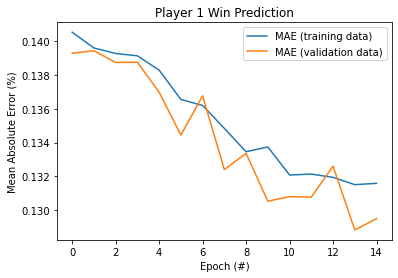

In [25]:
# Plot history: MAE
plt.plot(h.history['loss'], label='MAE (training data)')
plt.plot(h.history['val_loss'], label='MAE (validation data)')
plt.title('Player 1 Win Prediction')
plt.ylabel('Mean Absolute Error (%)')
plt.xlabel('Epoch (#)')
plt.legend(loc="upper right")
plt.show()

As you can see from the above plot the network is successfull in lowering is loss.